









# Capstone Project – The Battle of Neighborhoods | Finding a Better Place in North York, Toronto Canada






#   

### IMPORTING LIBRARIES

In [58]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup

In [59]:
url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
data = requests.get(url).text



Creating Soup object to extract data

In [60]:
soup = BeautifulSoup(data, "html5lib")



formatting extracted text in to list

In [61]:
table_contents=[]
table=soup.find('table')
for row in table.findAll('td'):
    cell = {}
    if row.span.text=='Not assigned':
        pass
    else:
        cell['PostalCode'] = row.p.text[:3]
        cell['Borough'] = (row.span.text).split('(')[0]
        cell['Neighborhood'] = (((((row.span.text).split('(')[1]).strip(')')).replace(' /',',')).replace(')',' ')).strip(' ')
        table_contents.append(cell)


In [62]:
table_contents

[{'PostalCode': 'M3A', 'Borough': 'North York', 'Neighborhood': 'Parkwoods'},
 {'PostalCode': 'M4A',
  'Borough': 'North York',
  'Neighborhood': 'Victoria Village'},
 {'PostalCode': 'M5A',
  'Borough': 'Downtown Toronto',
  'Neighborhood': 'Regent Park, Harbourfront'},
 {'PostalCode': 'M6A',
  'Borough': 'North York',
  'Neighborhood': 'Lawrence Manor, Lawrence Heights'},
 {'PostalCode': 'M7A',
  'Borough': "Queen's Park",
  'Neighborhood': 'Ontario Provincial Government'},
 {'PostalCode': 'M9A',
  'Borough': 'Etobicoke',
  'Neighborhood': 'Islington Avenue'},
 {'PostalCode': 'M1B',
  'Borough': 'Scarborough',
  'Neighborhood': 'Malvern, Rouge'},
 {'PostalCode': 'M3B',
  'Borough': 'North York',
  'Neighborhood': 'Don Mills North'},
 {'PostalCode': 'M4B',
  'Borough': 'East York',
  'Neighborhood': 'Parkview Hill, Woodbine Gardens'},
 {'PostalCode': 'M5B',
  'Borough': 'Downtown Toronto',
  'Neighborhood': 'Garden District, Ryerson'},
 {'PostalCode': 'M6B', 'Borough': 'North York', 'N

Converting list to pandas dataframe

In [63]:
df = pd.DataFrame(table_contents)

In [64]:
df

,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Queen's Park,Ontario Provincial Government
...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North"
99,M4Y,Downtown Toronto,Church and Wellesley
100,M7Y,East TorontoBusiness reply mail Processing Cen...,Enclave of M4L
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu..."


Formatting proper table

In [65]:
df=pd.DataFrame(table_contents)
df['Borough']=df['Borough'].replace({'Downtown TorontoStn A PO Boxes25 The Esplanade':'Downtown Toronto Stn A',
                                             'East TorontoBusiness reply mail Processing Centre969 Eastern':'East Toronto Business',
                                             'EtobicokeNorthwest':'Etobicoke Northwest','East YorkEast Toronto':'East York/East Toronto',
                                             'MississaugaCanada Post Gateway Processing Centre':'Mississauga'})


In [66]:
df.head()

,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Queen's Park,Ontario Provincial Government


In [67]:
df.shape

(103, 3)

In [68]:
df.Borough #ttt

0                 North York
1                 North York
2           Downtown Toronto
3                 North York
4               Queen's Park
               ...          
98                 Etobicoke
99          Downtown Toronto
100    East Toronto Business
101                Etobicoke
102                Etobicoke
Name: Borough, Length: 103, dtype: object

In [69]:
df.Borough.unique() #ttt

array(['North York', 'Downtown Toronto', "Queen's Park", 'Etobicoke',
       'Scarborough', 'East York', 'York', 'East Toronto', 'West Toronto',
       'East York/East Toronto', 'Central Toronto', 'Mississauga',
       'Downtown Toronto Stn A', 'Etobicoke Northwest',
       'East Toronto Business'], dtype=object)

In [70]:
!pip install geocoder
import geocoder # import geocoder

In [71]:
# initialize your variable to None
lat_lng_coords = None

In [72]:
df_geo = pd.read_csv('GeospatialCoordinates.csv')
df_geo

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476
...,...,...,...
98,M9N,43.706876,-79.518188
99,M9P,43.696319,-79.532242
100,M9R,43.688905,-79.554724
101,M9V,43.739416,-79.588437


In [73]:
df_geo.dtypes

Postal Code     object
Latitude       float64
Longitude      float64
dtype: object

In [74]:
df.dtypes

PostalCode      object
Borough         object
Neighborhood    object
dtype: object

In [75]:
df.shape

(103, 3)

In [76]:
df_geo.shape

(103, 3)

In [77]:
df.drop_duplicates()

,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Queen's Park,Ontario Provincial Government
...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North"
99,M4Y,Downtown Toronto,Church and Wellesley
100,M7Y,East Toronto Business,Enclave of M4L
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu..."


In [78]:
df = df.join(df_geo.set_index('Postal Code'), on='PostalCode')
df

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Queen's Park,Ontario Provincial Government,43.662301,-79.389494
...,...,...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",43.653654,-79.506944
99,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160
100,M7Y,East Toronto Business,Enclave of M4L,43.662744,-79.321558
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu...",43.636258,-79.498509


In [79]:
df = df.reset_index()

In [80]:
df.drop(['index'], axis = 'columns', inplace = True)

In [81]:
df.head()


,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Queen's Park,Ontario Provincial Government,43.662301,-79.389494


In [82]:
df.shape

(103, 5)

In [83]:
df.Borough.unique()

array(['North York', 'Downtown Toronto', "Queen's Park", 'Etobicoke',
       'Scarborough', 'East York', 'York', 'East Toronto', 'West Toronto',
       'East York/East Toronto', 'Central Toronto', 'Mississauga',
       'Downtown Toronto Stn A', 'Etobicoke Northwest',
       'East Toronto Business'], dtype=object)

In [84]:
df[['PostalCode', 'Borough', 'Neighborhood', 'Latitude',]]

,PostalCode,Borough,Neighborhood,Latitude
0,M3A,North York,Parkwoods,43.753259
1,M4A,North York,Victoria Village,43.725882
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518
4,M7A,Queen's Park,Ontario Provincial Government,43.662301
...,...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",43.653654
99,M4Y,Downtown Toronto,Church and Wellesley,43.665860
100,M7Y,East Toronto Business,Enclave of M4L,43.662744
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu...",43.636258


In [85]:
NorthYorkDataFrame = df[df['Borough'] == 'North York']
NorthYorkDataFrame

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
7,M3B,North York,Don Mills North,43.745906,-79.352188
10,M6B,North York,Glencairn,43.709577,-79.445073
13,M3C,North York,Don Mills South,43.725900,-79.340923
27,M2H,North York,Hillcrest Village,43.803762,-79.363452
28,M3H,North York,"Bathurst Manor, Wilson Heights, Downsview North",43.754328,-79.442259
33,M2J,North York,"Fairview, Henry Farm, Oriole",43.778517,-79.346556
34,M3J,North York,"Northwood Park, York University",43.767980,-79.487262


## using foursquare api to segment and cluster neighborhood in North York

### Use geopy library to get the latitude and longitude values of North York City.


In [98]:
import geocoder
from geopy.geocoders import Nominatim 

In [100]:
address = 'North York'

geolocator = Nominatim(user_agent="North York_explorer")
location = geolocator.geocode(address)
latitude_x = location.latitude
longitude_y = location.longitude
print('The Geograpical Co-ordinate of North York Toronto are {}, {}.'.format(latitude_x, longitude_y))

The Geograpical Co-ordinate of North York Toronto are 43.7543263, -79.44911696639593.


#### Create a map of NORTH YORK with neighborhoods superimposed on top.


In [101]:
import folium

# create map of NORTH YORK using latitude and longitude values
map_NY = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(NorthYorkDataFrame['Latitude'], NorthYorkDataFrame['Longitude'], NorthYorkDataFrame['Borough'], NorthYorkDataFrame['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        ).add_to(map_NY)  
    
map_NY

Defining Foursquare Api Parameters

In [106]:
# @hidden_cell
CLIENT_ID = 'PGZEZZJM5SWKRZVDJZBCY5NAHCGNYYXJOQJORUVDUGX5DERZ' # your Foursquare ID
CLIENT_SECRET = 'TH2MRNQI2H3CDFEOUDISMTBAUZY33GXYGT0DYTC5DPYX0LKO' # your Foursquare Secret
VERSION = '20180604' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: PGZEZZJM5SWKRZVDJZBCY5NAHCGNYYXJOQJORUVDUGX5DERZ
CLIENT_SECRET:TH2MRNQI2H3CDFEOUDISMTBAUZY33GXYGT0DYTC5DPYX0LKO


EXPLORING DATA WITHIN 700MTRS RANGE

In [33]:
neighborhood_latitude = df.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = df.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = df.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Parkwoods are 43.7532586, -79.3296565.


FORMING GET REQUEST

In [107]:
LIMIT = 100
radius = 700
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=PGZEZZJM5SWKRZVDJZBCY5NAHCGNYYXJOQJORUVDUGX5DERZ&client_secret=TH2MRNQI2H3CDFEOUDISMTBAUZY33GXYGT0DYTC5DPYX0LKO&v=20180604&ll=43.7532586,-79.3296565&radius=700&limit=100'

In [108]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '60da03a4007caa7cd2731a6d'},
 'response': {'headerLocation': 'Parkwoods - Donalda',
  'headerFullLocation': 'Parkwoods - Donalda, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 5,
  'suggestedBounds': {'ne': {'lat': 43.75955860630001,
    'lng': -79.32095093578899},
   'sw': {'lat': 43.74695859369999, 'lng': -79.33836206421101}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4e6696b6d16433b9ffff47c3',
       'name': 'KFC',
       'location': {'lat': 43.75438666345904,
        'lng': -79.3330206627504,
        'labeledLatLngs': [{'label': 'display',
          'lat': 43.75438666345904,
          'lng': -79.3330206627504}],
        'distance': 298,
        'cc': 'CA',
        'country': 'Canada',
        'for

In [109]:
import json
from pandas.io.json import json_normalize
venues=results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues)
nearby_venues.columns

<ipython-input-109-4128a56fc108>:4: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  nearby_venues = json_normalize(venues)


Index(['referralId', 'reasons.count', 'reasons.items', 'venue.id',
       'venue.name', 'venue.location.lat', 'venue.location.lng',
       'venue.location.labeledLatLngs', 'venue.location.distance',
       'venue.location.cc', 'venue.location.country',
       'venue.location.formattedAddress', 'venue.categories',
       'venue.photos.count', 'venue.photos.groups', 'venue.location.address',
       'venue.location.city', 'venue.location.state', 'venue.venuePage.id'],
      dtype='object')

In [110]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

### Nearby Venues / Locations

In [111]:
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]
nearby_venues.head()

,venue.name,venue.categories,venue.location.lat,venue.location.lng
0,KFC,"[{'id': '4bf58dd8d48988d16e941735', 'name': 'F...",43.754387,-79.333021
1,Brookbanks Park,"[{'id': '4bf58dd8d48988d163941735', 'name': 'P...",43.751976,-79.332140
2,Variety Store,"[{'id': '4bf58dd8d48988d1f9941735', 'name': 'F...",43.751974,-79.333114
3,PetSmart,"[{'id': '4bf58dd8d48988d100951735', 'name': 'P...",43.748639,-79.333488
4,Joey,"[{'id': '4bf58dd8d48988d16c941735', 'name': 'B...",43.753441,-79.321640


### Categories of Nearby Venues / Locations

In [112]:
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head(5)

,name,categories,lat,lng
0,KFC,Fast Food Restaurant,43.754387,-79.333021
1,Brookbanks Park,Park,43.751976,-79.332140
2,Variety Store,Food & Drink Shop,43.751974,-79.333114
3,PetSmart,Pet Store,43.748639,-79.333488
4,Joey,Burger Joint,43.753441,-79.321640


In [116]:
# Top 10 Categories
a=pd.Series(nearby_venues.categories)
a.value_counts()[:10]

Food & Drink Shop       1
Burger Joint            1
Pet Store               1
Park                    1
Fast Food Restaurant    1
Name: categories, dtype: int64

GeneralizING to obtain the venues from all neighbourhoods in North York

In [117]:
def getNearbyVenues(names, latitudes, longitudes, radius=700):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [118]:
NorthYork_venues = getNearbyVenues(names=NorthYorkDataFrame['Neighborhood'],
                                   latitudes=NorthYorkDataFrame['Latitude'],
                                   longitudes=NorthYorkDataFrame['Longitude']
                                  )

Parkwoods
Victoria Village
Lawrence Manor, Lawrence Heights
Don Mills North
Glencairn
Don Mills South
Hillcrest Village
Bathurst Manor, Wilson Heights, Downsview North
Fairview, Henry Farm, Oriole
Northwood Park, York University
Bayview Village
Downsview East
York Mills, Silver Hills
Downsview West
North Park, Maple Leaf Park, Upwood Park
Humber Summit
Willowdale, Newtonbrook
Downsview Central
Bedford Park, Lawrence Manor East
Humberlea, Emery
Willowdale South
Downsview Northwest
York Mills West
Willowdale West


In [125]:
print('There are {} Uniques Categories.'.format(len(NorthYork_venues['Venue Category'].unique())))
NorthYork_venues.groupby('Neighbourhood').count().head()

There are 115 Uniques Categories.


,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
"Bathurst Manor, Wilson Heights, Downsview North",19,19,19,19,19,19
Bayview Village,9,9,9,9,9,9
"Bedford Park, Lawrence Manor East",33,33,33,33,33,33
Don Mills North,8,8,8,8,8,8
Don Mills South,19,19,19,19,19,19


### One Hot Encoding of Features

In [129]:
# one hot encoding
NorthYork_onehot = pd.get_dummies(NorthYork_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighbourhood column back to dataframe
NorthYork_onehot['Neighbourhood'] = NorthYork_venues['Neighbourhood'] 

# move neighbourhood column to the first column
fixed_columns = [NorthYork_onehot.columns[-1]] + list(NorthYork_onehot.columns[:-1])
NorthYork_onehot = NorthYork_onehot[fixed_columns]
NorthYork_grouped = NorthYork_onehot.groupby('Neighbourhood').mean().reset_index()
NorthYork_onehot.head(5)

,Neighbourhood,Airport,American Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Bagel Shop,Bakery,...,Tennis Court,Thai Restaurant,Theater,Toy / Game Store,Trail,Video Game Store,Video Store,Vietnamese Restaurant,Wine Shop,Women's Store
0,Parkwoods,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Parkwoods,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Parkwoods,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Parkwoods,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Parkwoods,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [130]:
num_top_venues = 5
for hood in NorthYork_grouped['Neighbourhood']:
    print("---- "+hood+" ----")
    temp =NorthYork_grouped[NorthYork_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

---- Bathurst Manor, Wilson Heights, Downsview North ----
         venue  freq
0         Park  0.11
1  Coffee Shop  0.11
2         Bank  0.11
3     Pharmacy  0.05
4  Gas Station  0.05


---- Bayview Village ----
                venue  freq
0                Bank  0.22
1  Chinese Restaurant  0.11
2        Intersection  0.11
3          Playground  0.11
4       Grocery Store  0.11


---- Bedford Park, Lawrence Manor East ----
                venue  freq
0         Coffee Shop  0.09
1  Italian Restaurant  0.06
2      Sandwich Place  0.06
3          Restaurant  0.06
4            Pharmacy  0.03


---- Don Mills North ----
                           venue  freq
0            Japanese Restaurant  0.25
1                    Pizza Place  0.12
2                            Gym  0.12
3                   Dessert Shop  0.12
4  Paper / Office Supplies Store  0.12


---- Don Mills South ----
          venue  freq
0    Restaurant  0.11
1   Coffee Shop  0.11
2           Gym  0.11
3  Intersection  0.05
4    B

In [131]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

### Most Common venues near neighborhood

In [134]:
import numpy as np
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighbourhood'] = NorthYork_grouped['Neighbourhood']

for ind in np.arange(NorthYork_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(NorthYork_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Bathurst Manor, Wilson Heights, Downsview North",Coffee Shop,Park,Bank,Gas Station,Shopping Mall,Middle Eastern Restaurant,Pharmacy,Pizza Place,Restaurant,Sandwich Place
1,Bayview Village,Bank,Skating Rink,Chinese Restaurant,Café,Japanese Restaurant,Intersection,Playground,Grocery Store,Dance Studio,Deli / Bodega
2,"Bedford Park, Lawrence Manor East",Coffee Shop,Italian Restaurant,Restaurant,Sandwich Place,Frozen Yogurt Shop,Wine Shop,Liquor Store,Comfort Food Restaurant,Juice Bar,Café
3,Don Mills North,Japanese Restaurant,Pizza Place,Gym,Paper / Office Supplies Store,Caribbean Restaurant,Café,Dessert Shop,Distribution Center,Cosmetics Shop,Cupcake Shop
4,Don Mills South,Gym,Coffee Shop,Restaurant,Clothing Store,Intersection,Dance Studio,Chinese Restaurant,Dim Sum Restaurant,Sandwich Place,Italian Restaurant


## Cluster Neighborhoods


Run _k_-means to cluster the neighborhood into 5 clusters.


In [135]:

# import k-means from clustering stage
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 5

NorthYork_grouped_clustering = NorthYork_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(NorthYork_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([2, 2, 2, 2, 2, 4, 2, 2, 0, 2])

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.


In [169]:

#NorthYork_merged = NorthYorkDataFrame
# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
NorthYork_merged = NorthYorkDataFrame.join(neighborhoods_venues_sorted.set_index('Neighbourhood'), on='Neighborhood')

NorthYork_merged.head() # check the last columns!

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M3A,North York,Parkwoods,43.753259,-79.329656,0.0,Pet Store,Park,Food & Drink Shop,Fast Food Restaurant,Burger Joint,Discount Store,Convenience Store,Cosmetics Shop,Cupcake Shop,Dance Studio
1,M4A,North York,Victoria Village,43.725882,-79.315572,0.0,Hockey Arena,Intersection,Coffee Shop,Pizza Place,Playground,Portuguese Restaurant,Sporting Goods Shop,Financial or Legal Service,Park,Fish Market
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763,2.0,Vietnamese Restaurant,Fast Food Restaurant,Coffee Shop,Clothing Store,Women's Store,Bowling Alley,Gift Shop,Furniture / Home Store,Dessert Shop,Men's Store
7,M3B,North York,Don Mills North,43.745906,-79.352188,2.0,Japanese Restaurant,Pizza Place,Gym,Paper / Office Supplies Store,Caribbean Restaurant,Café,Dessert Shop,Distribution Center,Cosmetics Shop,Cupcake Shop
10,M6B,North York,Glencairn,43.709577,-79.445073,2.0,Pizza Place,Sushi Restaurant,Playground,Latin American Restaurant,Metro Station,Japanese Restaurant,Italian Restaurant,Ice Cream Shop,Restaurant,Sandwich Place


## FINALLY LETS VISUALIZE THE RESULTING CLUSTER

In [170]:
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

NorthYork_merged_nonan = NorthYork_merged.dropna(subset=['Cluster Labels'])

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(NorthYork_merged_nonan['Latitude'], NorthYork_merged_nonan['Longitude'], NorthYork_merged_nonan['Neighborhood'], NorthYork_merged_nonan['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster-1)],
        fill=True,
        fill_color=rainbow[int(cluster-1)],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

CHECKING CLUSTERS
CLUSTER 1

In [222]:
NorthYork_merged_nonan.loc[NorthYork_merged_nonan['Cluster Labels'] == 0, NorthYork_merged_nonan.columns[[1] + list(range(5, NorthYork_merged_nonan.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,North York,0.0,Pet Store,Park,Food & Drink Shop,Fast Food Restaurant,Burger Joint,Discount Store,Convenience Store,Cosmetics Shop,Cupcake Shop,Dance Studio
1,North York,0.0,Hockey Arena,Intersection,Coffee Shop,Pizza Place,Playground,Portuguese Restaurant,Sporting Goods Shop,Financial or Legal Service,Park,Fish Market
46,North York,0.0,Pizza Place,Shopping Mall,Grocery Store,Coffee Shop,Moving Target,Bank,Park,Convenience Store,Cosmetics Shop,Cupcake Shop
49,North York,0.0,Home Service,Park,Bakery,Business Service,Construction & Landscaping,Women's Store,Distribution Center,Cosmetics Shop,Cupcake Shop,Dance Studio
52,North York,0.0,Park,Trail,Coffee Shop,Pizza Place,Gas Station,Gift Shop,Greek Restaurant,Construction & Landscaping,Convenience Store,Cosmetics Shop
66,North York,0.0,Park,Bowling Alley,Intersection,Convenience Store,Gym,Furniture / Home Store,Discount Store,Greek Restaurant,Gift Shop,Cosmetics Shop
72,North York,0.0,Pizza Place,Coffee Shop,Discount Store,Park,Pharmacy,Grocery Store,Athletics & Sports,Construction & Landscaping,Cosmetics Shop,Cupcake Shop


CLUSTER 2

In [221]:
 NorthYork_merged_nonan.loc[NorthYork_merged_nonan['Cluster Labels'] == 1, NorthYork_merged_nonan.columns[[1] + list(range(5, NorthYork_merged_nonan.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
57,North York,1.0,Convenience Store,Gas Station,Auto Garage,Discount Store,Women's Store,Electronics Store,Cosmetics Shop,Cupcake Shop,Dance Studio,Deli / Bodega


CLUSTER 3

In [223]:
 NorthYork_merged_nonan.loc[NorthYork_merged_nonan['Cluster Labels'] == 2, NorthYork_merged_nonan.columns[[1] + list(range(5, NorthYork_merged_nonan.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,North York,2.0,Vietnamese Restaurant,Fast Food Restaurant,Coffee Shop,Clothing Store,Women's Store,Bowling Alley,Gift Shop,Furniture / Home Store,Dessert Shop,Men's Store
7,North York,2.0,Japanese Restaurant,Pizza Place,Gym,Paper / Office Supplies Store,Caribbean Restaurant,Café,Dessert Shop,Distribution Center,Cosmetics Shop,Cupcake Shop
10,North York,2.0,Pizza Place,Sushi Restaurant,Playground,Latin American Restaurant,Metro Station,Japanese Restaurant,Italian Restaurant,Ice Cream Shop,Restaurant,Sandwich Place
13,North York,2.0,Gym,Coffee Shop,Restaurant,Clothing Store,Intersection,Dance Studio,Chinese Restaurant,Dim Sum Restaurant,Sandwich Place,Italian Restaurant
27,North York,2.0,Pharmacy,Bakery,Sandwich Place,Chinese Restaurant,Fast Food Restaurant,Restaurant,Tennis Court,Women's Store,Dessert Shop,Department Store
28,North York,2.0,Coffee Shop,Park,Bank,Gas Station,Shopping Mall,Middle Eastern Restaurant,Pharmacy,Pizza Place,Restaurant,Sandwich Place
33,North York,2.0,Clothing Store,Coffee Shop,Fast Food Restaurant,Japanese Restaurant,Intersection,Baseball Field,Restaurant,Shoe Store,Bank,Cosmetics Shop
34,North York,2.0,Coffee Shop,Caribbean Restaurant,Japanese Restaurant,Miscellaneous Shop,Bar,Fast Food Restaurant,Women's Store,Distribution Center,Cupcake Shop,Dance Studio
39,North York,2.0,Bank,Skating Rink,Chinese Restaurant,Café,Japanese Restaurant,Intersection,Playground,Grocery Store,Dance Studio,Deli / Bodega
40,North York,2.0,Airport,Bakery,Coffee Shop,Chinese Restaurant,Sandwich Place,Park,Frozen Yogurt Shop,Dim Sum Restaurant,Convenience Store,Greek Restaurant


CLUSTER 4  

In [174]:
NorthYork_merged_nonan.loc[NorthYork_merged_nonan['Cluster Labels'] == 3, NorthYork_merged_nonan.columns[[1] + list(range(5, NorthYork_merged_nonan.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
50,North York,3.0,Bakery,Pizza Place,Arts & Crafts Store,Falafel Restaurant,Convenience Store,Cosmetics Shop,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store


CLUSTER 5

In [175]:
NorthYork_merged_nonan.loc[NorthYork_merged_nonan['Cluster Labels'] == 4, NorthYork_merged_nonan.columns[[1] + list(range(5, NorthYork_merged_nonan.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
53,North York,4.0,Vietnamese Restaurant,Home Service,Middle Eastern Restaurant,Baseball Field,Medical Supply Store,Women's Store,Distribution Center,Cosmetics Shop,Cupcake Shop,Dance Studio


In [185]:
NorthYork_Avg_HousingPrice=pd.DataFrame({"Neighbourhood":NorthYorkDataFrame["Neighborhood"],
                                      "Average_Housing_Price":[335000.0,286600.0,175000.0,225900.0,219400.0,
                                                               573900.0,225000.0,370500.0,370500.0,433500.0,279200.0,
                                                               279200.0,225000.0,370500.,255400.0,433500.0,433500.0,
                                                               435000.0,289500.0,265000.0,285900.0,239400.0,
                                                               589900.0,295000.0
                                                               
                                                              ]})

In [187]:
NorthYork_Avg_HousingPrice.set_index('Neighbourhood',inplace=True,drop=True)

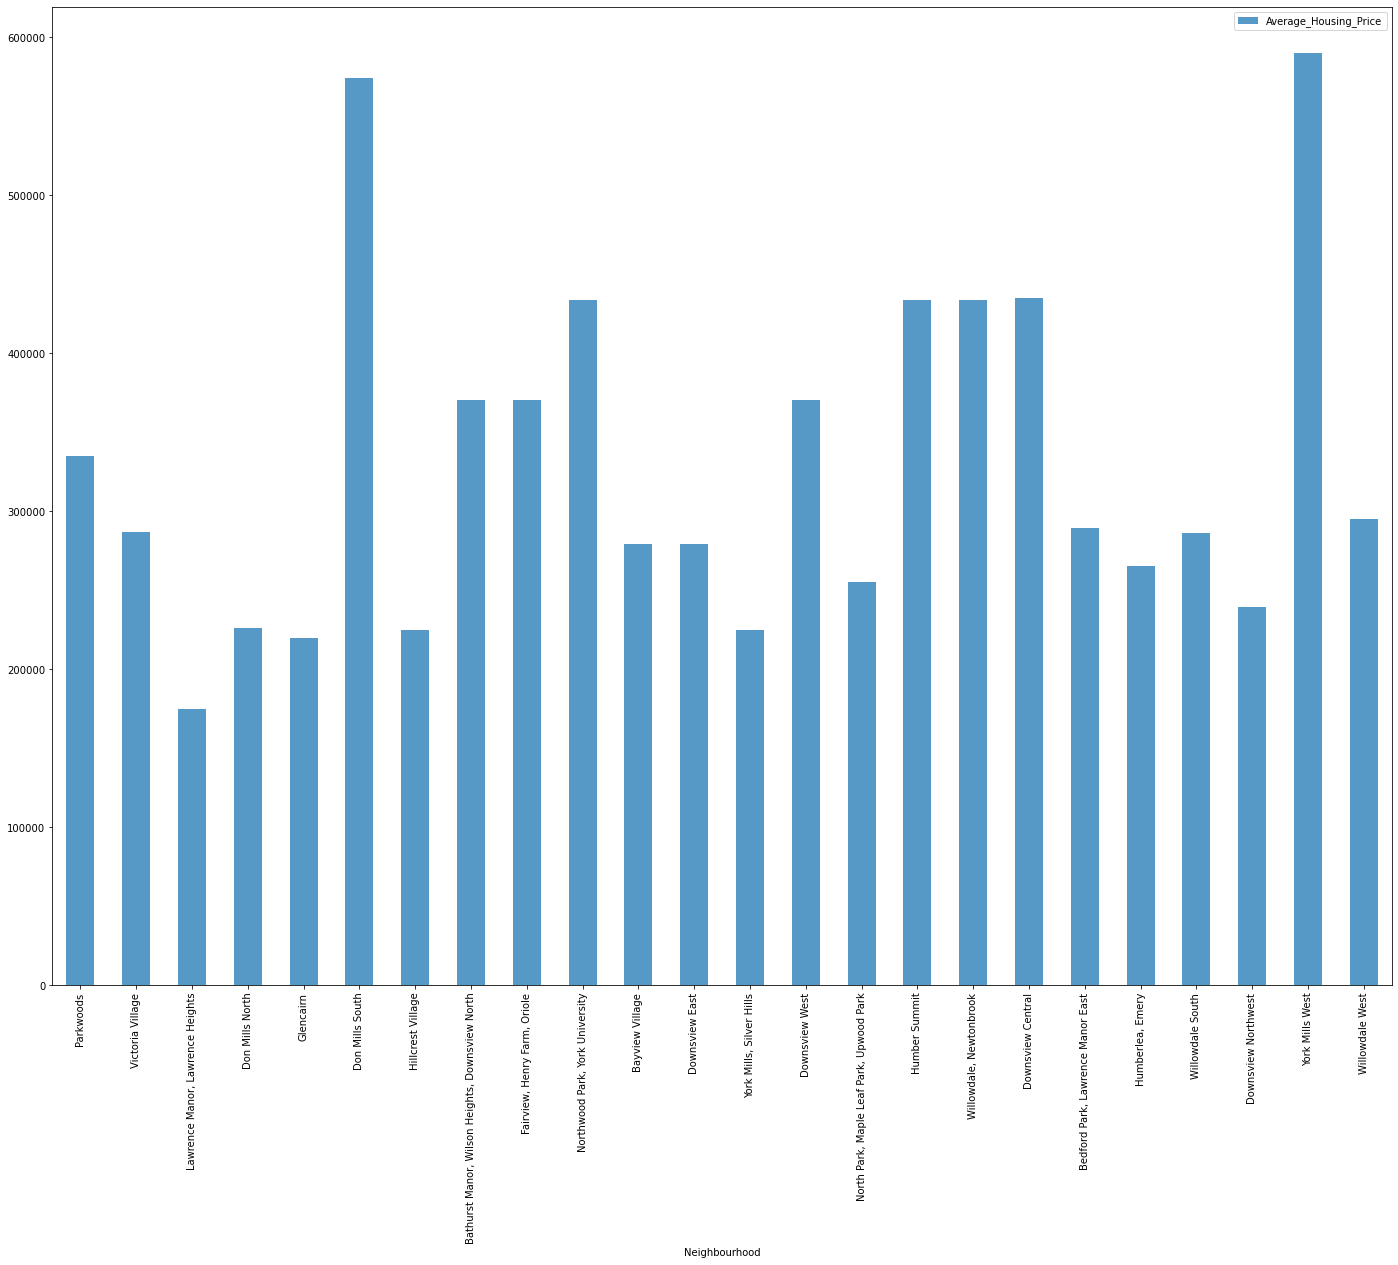

In [188]:
NorthYork_Avg_HousingPrice.plot(kind='bar',figsize=(24,18),alpha=0.75)

### School Rating by Clusters

In [214]:
NorthYork_school_ratings=pd.DataFrame({"Neighbourhood":NorthYorkDataFrame["Neighborhood"],
                                      "School Ratings":[7,9,5,8,10,10,7,10,1,2,1,2,7,2,3,2,6,
                                                           5,4,8,9,9,6,6
                                                               
                                                              ]})

In [215]:
NorthYork_school_ratings.set_index('Neighbourhood',inplace=True,drop=True)

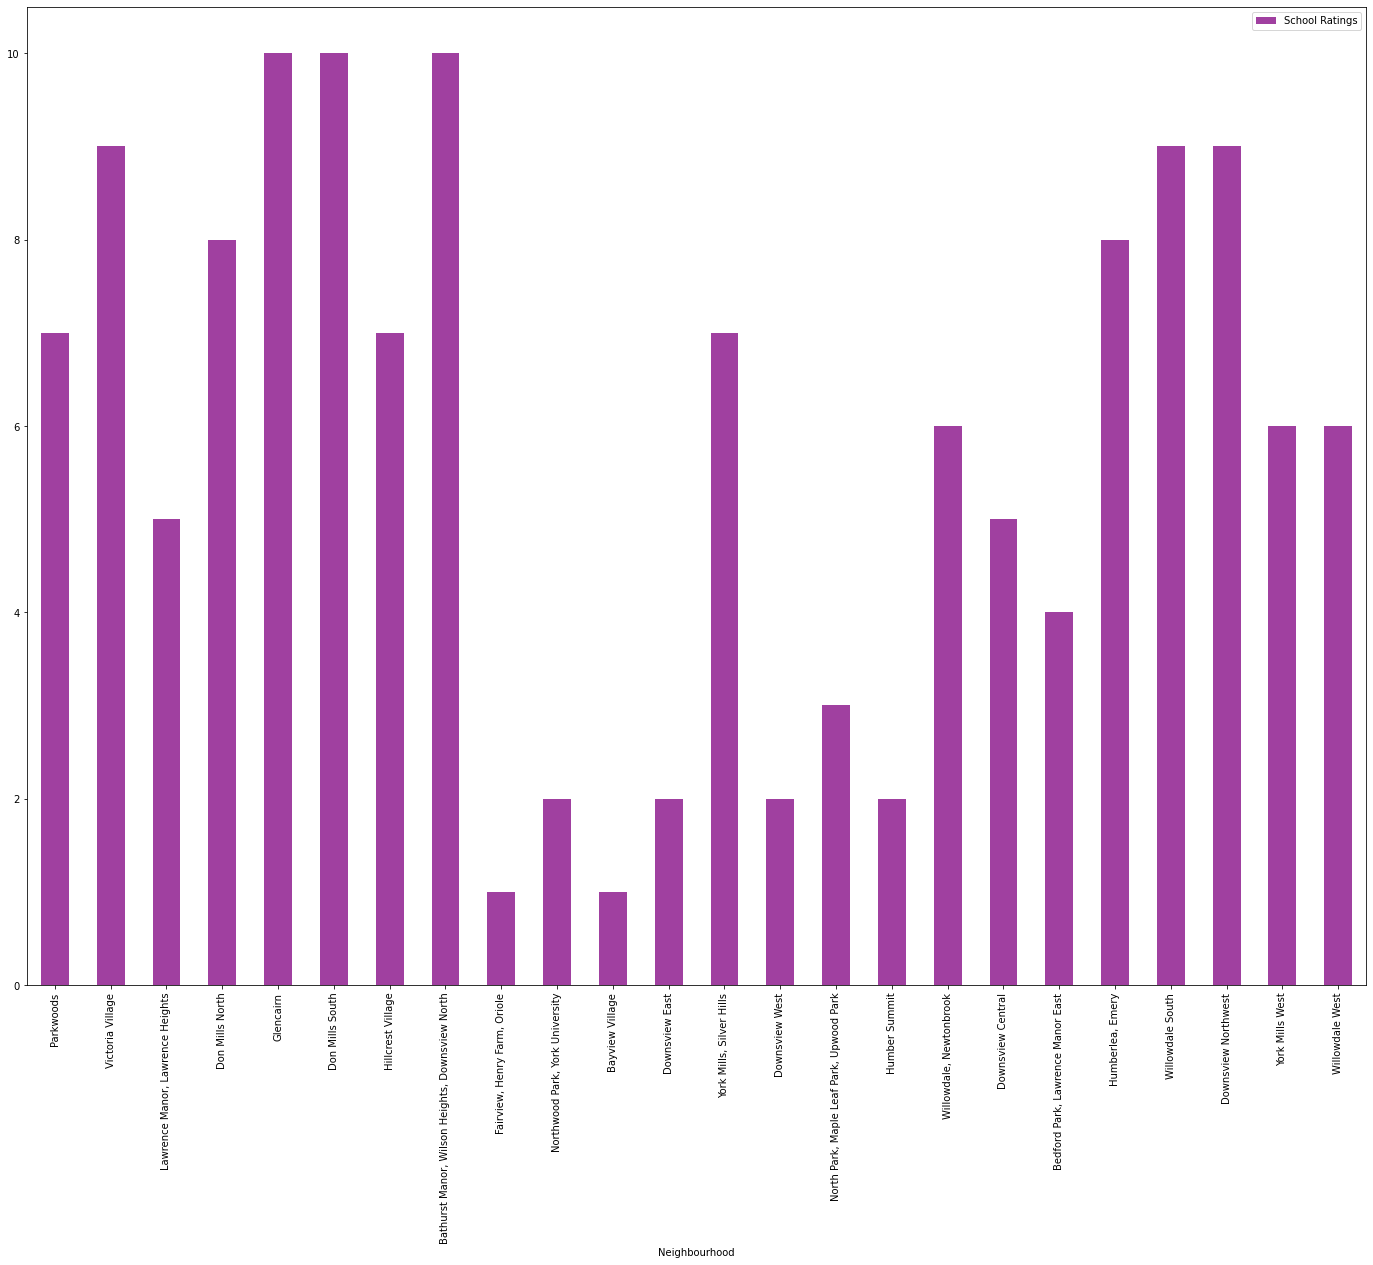

In [220]:
NorthYork_school_ratings.plot(kind='bar',figsize=(24,18),color='purple',alpha=0.75)

Conclusion: In this project, using k-means cluster algorithm I separated the neighborhood into 10(Ten) different clusters and for 103 different lattitude and logitude from dataset, which have very-similar neighborhoods around them. Using the charts above results presented to a particular neighborhood based on average house prices and school rating have been made.